In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
print(os.listdir('./../../data/preprocessed_data/tp_and_tn/tn/measured'))
data_ = pickle.load(open('./../../data/preprocessed_data/tp_and_tn/tn/measured/tn_data.pkl', "rb" ))
meta_info = pickle.load(open('./../../data/preprocessed_data/tp_and_tn/tn/measured/tn_meta_info.pkl', "rb" ))

print(data_)
print(data_.shape)

#data = data_[:,0,:] # first dimension
print(data.shape)

['tn_data.pkl', 'tn_meta_info.pkl']
[[[0.50501672 0.50543826 0.50535535 ... 0.99239595 0.98973741 0.98615058]
  [0.98754153 0.99013335 0.9921041  ... 0.48887826 0.48838176 0.48858576]
  [0.01384365 0.01059982 0.0073732  ... 0.02092944 0.0233494  0.0257791 ]]

 [[0.49165275 0.49056632 0.49006374 ... 0.988256   0.98514884 0.99408083]
  [0.97682119 0.97860635 0.98113131 ... 0.5063181  0.50721398 0.49754672]
  [0.03451109 0.03069505 0.02755347 ... 0.00845985 0.01096962 0.01131647]]

 [[0.49622166 0.49671481 0.49697451 ... 0.98954474 0.98628619 0.99177843]
  [0.98773508 0.98974511 0.99181888 ... 0.49325583 0.49376722 0.48691632]
  [0.01305057 0.00965387 0.00717661 ... 0.02452586 0.02691628 0.02778927]]

 ...

 [[0.50609756 0.50713625 0.50794724 ... 0.99087657 0.98643252 0.97603559]
  [0.98677518 0.99072852 0.99332908 ... 0.48978231 0.49105873 0.49574003]
  [0.01197605 0.00954871 0.00753947 ... 0.02400503 0.02859048 0.03262997]]

 [[0.50455005 0.50589859 0.50576732 ... 0.98155645 0.97884044 

In [3]:
input_dimension = 200

input_sample = keras.Input(shape=(3,input_dimension))

hidden1 = layers.Dense(150, activation='relu')(input_sample)

hidden2 = layers.Dense(100, activation='relu')(hidden1)
hidden3 = layers.Dense(50, activation='relu')(hidden2)
hidden4 = layers.Dense(100, activation='relu')(hidden3)
hidden5 = layers.Dense(150, activation='relu')(hidden4)

decoded = layers.Dense(200, activation='sigmoid')(hidden5)

autoencoder = keras.Model(input_sample, decoded)

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 200)]          0         
_________________________________________________________________
dense (Dense)                (None, 3, 150)            30150     
_________________________________________________________________
dense_1 (Dense)              (None, 3, 100)            15100     
_________________________________________________________________
dense_2 (Dense)              (None, 3, 50)             5050      
_________________________________________________________________
dense_3 (Dense)              (None, 3, 100)            5100      
_________________________________________________________________
dense_4 (Dense)              (None, 3, 150)            15150     
_________________________________________________________________
dense_5 (Dense)              (None, 3, 200)           

In [6]:
print(data_[0].shape)
print(autoencoder.predict(data_[0]).shape)

(3, 200)
(3, 200)


In [7]:
autoencoder.fit(data, data,
                epochs=500,
                batch_size=256,
                shuffle=True,)
                #validation_data=(x_test, x_test))


Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6791
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5950
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4512
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3823
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3574
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3396
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3346
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3339
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3327
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3322
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3316
Epoch 13/500
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step - loss: 0.3230
Epoch 100/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3230
Epoch 101/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3229
Epoch 102/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3229
Epoch 103/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3228
Epoch 104/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3228
Epoch 105/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3228
Epoch 106/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3228
Epoch 107/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3228
Epoch 108/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3227
Epoch 109/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3227
Epoch 110/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 111/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 202/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 203/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 204/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 205/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 206/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 207/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 208/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 209/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 210/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 211/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 212/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 213/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.3218
Epoch 304/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 305/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 306/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 307/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 308/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 309/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 310/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 311/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 312/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 313/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 314/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 315/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 406/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 407/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 408/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 409/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 410/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 411/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3216
Epoch 412/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 413/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 414/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 415/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 416/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 417/500
5/5 [==============================] - 0

In [8]:
decoded_samples = autoencoder.predict(data_)


In [9]:
print(decoded_samples.shape)


(1140, 3, 200)


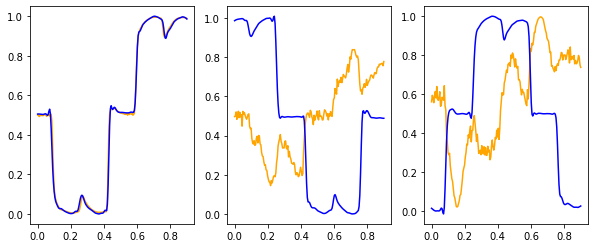

In [10]:
for i,val in enumerate(decoded_samples[:,0,:]):
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    
    
    axes[0].plot(meta_info['X'], decoded_samples[:,0,:][i], color='orange')
    axes[0].plot(meta_info['X'], data_[:,0,:][i], color='blue')
    
    axes[1].plot(meta_info['X'], decoded_samples[:,1,:][i], color='orange')
    axes[1].plot(meta_info['X'], data_[:,1,:][i], color='blue')
    
    axes[2].plot(meta_info['X'], decoded_samples[:,2,:][i], color='orange')
    axes[2].plot(meta_info['X'], data_[:,2,:][i], color='blue')
        
    plt.show()
    break